# 1.4 Frequency Distribution

Three differet text versions are provided by the LatEpig scraper.
- 'inscription': D(is) M(anibus) [s(acrum)] / Dan[
- 'inscription_conservative_cleaning': D M Dan
- 'inscription_interpretive_cleaning': Dis Manibus sacrum Dan

The 'inscription' contains modern integrations (i.e., [s(acrum)]), resolution of abbreviations (i.e., D(is)), divisions of line (i.e., /), blank within a line (i.e., [3]). For the complete list of special characters used by EDCS see: https://db.edcs.eu/epigr/hinweise/hinweis-en.html. Integrations, resolution of abbreviations, and insertion of missing letters are present in the interpretative cleaning without special characters. The conservative cleaning, instead, does not contains modern integrations on the text and the abbreviations are not resolved. The conservative cleaning does not indicate blanks within a line.

Inscriptions do not contain punctuation.

---

**What is transmitted on stone**

The dataset contains 172,958 Latin inscriptions for a total of **1,943,890 tokens in the conservative cleaning texts** (that is, the actual tokens present on stone) and **137,341 unique tokens** with a mean of 11.2 tokens per sentence.

Consider that the frequency of the letter 'M', an abbreviation used for different words (_Manibus, Marcus, merenti_), sums all the occurrences of the letter in the different contexts. Note also that the letter can also be an errant letter being preceded and/or followed by blank spaces on the stone.

The 10 most common tokens in the conservative corpus are single letters and 'et' (**M: 97,537**, D: 67,735, S: 53,357, ET: 53,357, ...). This is due to the fact that funerary texts largely contain abbreviations.

A plot shows the frequency distribution of the tokens in the conservative texts.

---

**Raw and relative frequency of words**

Firstly, word frequency (raw frequency, relative frequency, relative frequency per million) was calculated for words in the interpretive texts. The interpretive texts contains 2,007,668 words and 115,697 unique words.

A CSV file is generated containing the counting of the frequency of each word sorted in descending order.

The distribution of the word frequency follows the Zip's Law.

In [1]:
import pandas as pd
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

In [2]:
##open the dataset of funerary inscriptions (172,958 rows)
Inscriptions = pd.read_csv("/Users/u0154817/OneDrive - KU Leuven/Documents/ICLL Prague June 2023/Output/Tituli_Sepulcrales_new.csv")

In [3]:
len(Inscriptions)

172958

# 1.3.1 Conservative cleaning: what's on the stone

In [4]:
##lenght of tokens per sentence (mean) 11.2
import statistics

tokens_per_sentence = []

for i,inscription in enumerate(Inscriptions['inscription_conservative_cleaning']):
    sum_of_tokens = [] ##create a list to append all the tokens in a sentence
    inscription = str(inscription) ##convert to string
    tokenized_inscription = word_tokenize(inscription) ##tokenize the inscription with NLTK
    for token in tokenized_inscription:
        sum_of_tokens.append(token) ##append the token to the list
    sum_of_tokens = len(sum_of_tokens) ##calculate the lenght of the list
    tokens_per_sentence.append(sum_of_tokens) ##append the lenght to the Tokens_per_Sentence
    
mean = statistics.mean(tokens_per_sentence)
mean

11.23908694596376

In [5]:
##create a list of all the tokens (upper)
list_of_tokens_upper = []

for i,inscription in enumerate(Inscriptions['inscription_conservative_cleaning']):
    inscription = str(inscription)
    tokenized_inscription = word_tokenize(inscription) ##tokenize the inscription with NLTK
    for token in tokenized_inscription:
        token = token.upper()
        list_of_tokens_upper.append(token)

In [6]:
##number of tokens in the dataset (1,943,890)
len(list_of_tokens_upper)

1943890

In [7]:
counter_upper = Counter(list_of_tokens_upper)

##number of unique upper tokens (137,341)
len(counter_upper)

137341

In [8]:
##get the 300 most common tokens 
most_frequent_tokens_upper = counter_upper.most_common(300)
most_frequent_tokens_upper

[('M', 97537),
 ('D', 67735),
 ('S', 53357),
 ('ET', 50166),
 ('L', 43968),
 ('F', 35649),
 ('P', 32913),
 ('V', 31920),
 ('C', 30192),
 ('A', 28655),
 ('IN', 27158),
 ('VIXIT', 24928),
 ('H', 23359),
 ('E', 21697),
 ('T', 20129),
 ('AN', 18823),
 ('ANN', 15706),
 ('FECIT', 14976),
 ('Q', 14566),
 ('VIX', 13457),
 ('ANNIS', 12792),
 ('B', 11175),
 ('SIBI', 11090),
 ('BENE', 10215),
 ('PACE', 10201),
 ('QUI', 9744),
 ('I', 9222),
 ('QUE', 8997),
 ('CONIUGI', 8459),
 ('MERENTI', 8195),
 ('VI', 7193),
 ('X', 7162),
 ('N', 7054),
 ('III', 6966),
 ('II', 6211),
 ('FILIO', 5740),
 ('DIS', 5475),
 ('O', 5329),
 ('XX', 5253),
 ('SUIS', 5244),
 ('LIB', 5048),
 ('IIII', 5033),
 ('AUG', 5005),
 ('FIL', 4836),
 ('HIC', 4834),
 ('VII', 4795),
 ('XII', 4245),
 ('VIII', 4192),
 ('ANNOS', 4171),
 ('XXX', 4099),
 ('SUO', 3976),
 ('XI', 3825),
 ('IULIUS', 3788),
 ('XXV', 3779),
 ('US', 3668),
 ('MANIBUS', 3633),
 ('QUAE', 3609),
 ('EST', 3601),
 ('XV', 3596),
 ('LEG', 3501),
 ('CUM', 3424),
 ('KAL', 341

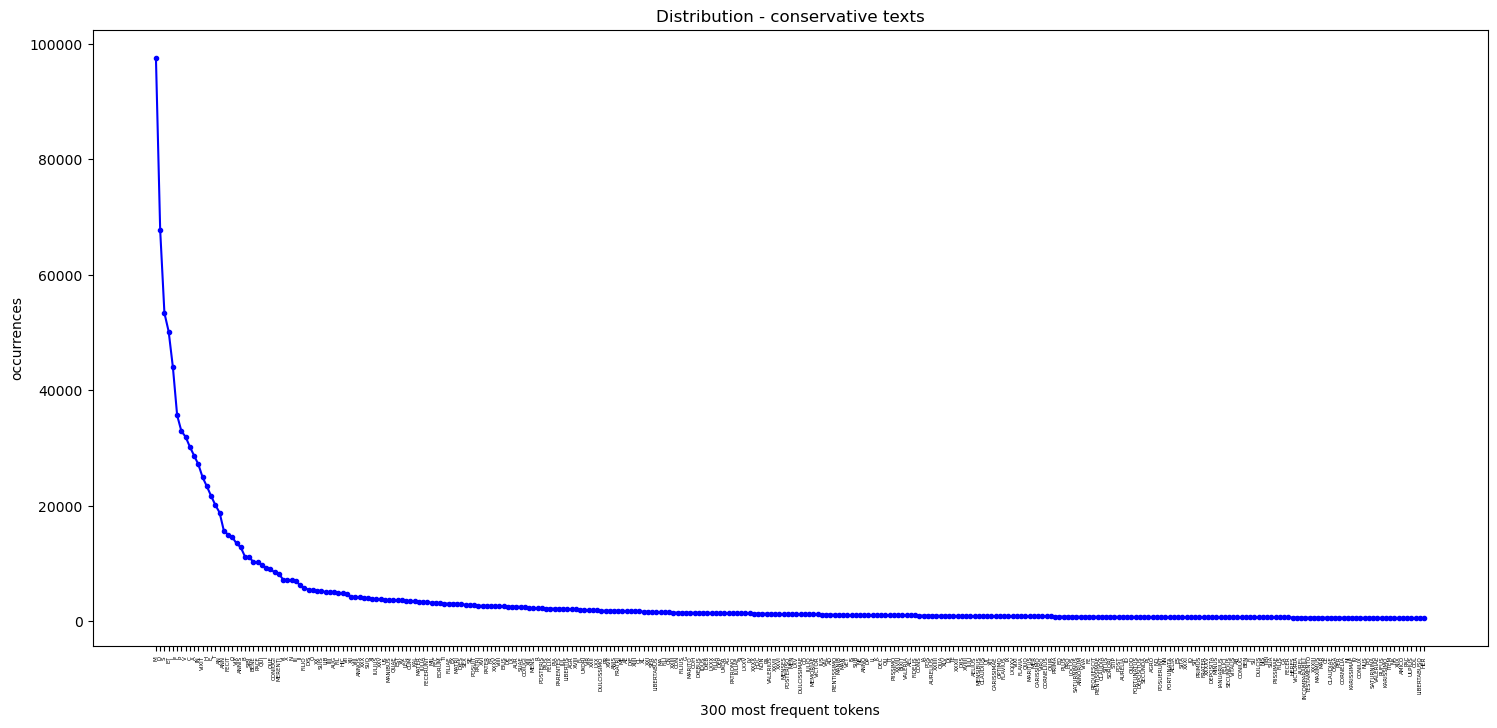

In [9]:
import matplotlib.pyplot as plt

##extract the words and counts
labels, values = zip(*most_frequent_tokens_upper)

##create a plot
plt.figure(figsize=(18, 8))
plt.plot(labels, values, marker='.', linestyle='-', color='b')
plt.ylabel('occurrences')
plt.xlabel('300 most frequent tokens')
plt.xticks(labels, rotation=90, fontsize=4)
plt.title('Distribution - conservative texts')

plt.show()

# 1.3.2 Interpretive cleaning: get some meaning out of it

In [10]:
##create a list of all the words in the interpretive texts
list_of_words = []

for i,inscription in enumerate(Inscriptions['inscription_interpretive_cleaning']):
    inscription = str(inscription)
    tokenized_inscription = word_tokenize(inscription) ##tokenize the inscription with NLTK
    for word in tokenized_inscription:
        word = word.lower()
        list_of_words.append(word)

In [11]:
##word count in the interpretive texts (2,007,668)
len(list_of_words)

2007668

In [12]:
counter_words = Counter(list_of_words) ##calculate the raw frequency

##number of unique words in interpretive texts (115,697)
len(counter_words)

115697

In [13]:
##get the 100 most frequent words in interpretive texts
most_frequent_words = counter_words.most_common(100)

In [14]:
##most frequent words ranked in terms of raw frequency
most_frequent_words

[('vixit', 67831),
 ('manibus', 65975),
 ('dis', 65783),
 ('et', 55056),
 ('annos', 50095),
 ('in', 31591),
 ('hic', 27439),
 ('fecit', 26399),
 ('bene', 22934),
 ('est', 22740),
 ('sacrum', 21157),
 ('merenti', 20592),
 ('annis', 18841),
 ('coniugi', 15627),
 ('pace', 14512),
 ('situs', 13814),
 ('sibi', 13478),
 ('filio', 12973),
 ('qui', 12803),
 ('que', 12294),
 ('filius', 12200),
 ('annorum', 11933),
 ('menses', 11907),
 ('pedes', 11673),
 ('caius', 9259),
 ('dies', 9125),
 ('lucius', 8939),
 ('filiae', 8604),
 ('quae', 8435),
 ('sita', 8367),
 ('cai', 8231),
 ('v', 8218),
 ('luci', 8162),
 ('libertus', 8128),
 ('marcus', 7123),
 ('iii', 6744),
 ('suis', 6716),
 ('filia', 6643),
 ('x', 6635),
 ('posuit', 6594),
 ('fecerunt', 6580),
 ('ii', 6324),
 ('i', 5955),
 ('vi', 5899),
 ('tibi', 5862),
 ('fronte', 5807),
 ('marci', 5551),
 ('kalendas', 5488),
 ('mensibus', 5409),
 ('iulius', 5237),
 ('xx', 5185),
 ('agro', 5165),
 ('posteris', 5116),
 ('diebus', 5103),
 ('iiii', 5094),
 ('li

In [15]:
##raw frequency descending order
raw_frequencies = counter_words.most_common(115697)

frequencies = pd.DataFrame(raw_frequencies, columns=['word', 'raw_frequency'])

In [16]:
len(list_of_words)

2007668

In [17]:
##calculate the relative frequency of the words

relative_frequencies = []
relat_frequencies_per_million = []

for i,raw_frequency in enumerate(frequencies['raw_frequency']):
    relative_frequency = raw_frequency / len(list_of_words)
    relative_frequencies.append(relative_frequency)
    relat_frequency_per_million = relative_frequency * 1000000
    relat_frequencies_per_million.append(relat_frequency_per_million)
    
frequencies['relative_frequency'] = relative_frequencies
frequencies['relat_frequency_per_million'] = relat_frequencies_per_million
frequencies

,word,raw_frequency,relative_frequency,relat_frequency_per_million
0,vixit,67831,3.378596e-02,33785.964612
1,manibus,65975,3.286151e-02,32861.508975
2,dis,65783,3.276588e-02,32765.875633
3,et,55056,2.742286e-02,27422.860752
4,annos,50095,2.495183e-02,24951.834666
...,...,...,...,...
115692,vocabant,1,4.980903e-07,0.498090
115693,intonsam,1,4.980903e-07,0.498090
115694,barbam,1,4.980903e-07,0.498090
115695,voltiavo,1,4.980903e-07,0.498090


In [19]:
frequencies.to_csv('1.4.Frequency_Count.csv', index=False)

# Zipf's law

Zipf's law (https://en.wikipedia.org/wiki/Zipf%27s_law) is an empirical law, that models the frequency distribution of words in languages. It states that the value of the nth entry is inversely proportional to n.  Zipf's Law suggests that word frequency follows a power-law distribution, where a small number of words have high frequencies and a large number of words have low frequencies.

You can express Zipf's law using the equation:
                                
                                                        F = k / r^s

where:
- F represents the frequency of a word,
- k is a constant,
- r represents the rank of the word, and
- s is a scaling parameter.

The value of s determines how quickly the frequencies decline as the rank increases and the steepness of the line in the graph. A smaller value of s results in a steeper drop, indicating a more pronounced concentration of occurrences in a few items. A larger value of s leads to a more gradual decline, suggesting a more evenly distributed frequency pattern.

The actual rank-frequency plot of a natural language text deviates in some extent from the ideal Zipf distribution, especially at the two ends of the range. At the low-frequency end, where the rank approaches N, the plot takes a staircase shape, because each word can occur only an integer number of times.

Scaling parameter (s): 1.0772550020910476


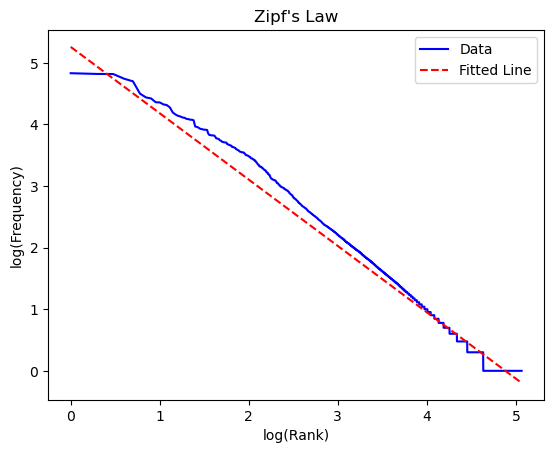

In [18]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

rank = np.arange(1, len(counter_words)+1) ##rank of the values
frequency = [freq for _, freq in raw_frequencies] ##create a list of frequency values descending order

# Calculate the logarithm of rank and frequency
log_rank = np.log10(rank)
log_frequency = np.log10(frequency)

# Perform linear regression to fit the data to a line
slope, intercept, r_value, p_value, std_err = linregress(log_rank, log_frequency)

# Print the estimated scaling parameter (slope)
scaling_parameter = -slope
print("Scaling parameter (s):", scaling_parameter)

# Plot the scatter plot and the fitted line
plt.plot(log_rank, log_frequency, linestyle='-', color='blue', label='Data')
plt.plot(log_rank, slope * log_rank + intercept, linestyle='--', color='red', label='Fitted Line')
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('Zipf\'s Law')
plt.legend()
plt.show()